# Data Exploration

The notebook explores the NIH Chest X-ray dataset as described below:

>Potential Dataset 2 : NIH Chest X-ray dataset

>Link: https://academictorrents.com/details/e615d3aebce373f1dc8bd9d11064da55bdadede0

>Size: 112,120 frontal-view X-ray images of 30,805 unique patients

>Color Space: Grayscale

>Resolution: 1024 x 1024 pixels

>Downstream task: Classification of common thoracic pathologies include Atelectasis, Consolidation, Infiltration, Pneumothorax, Edema, Emphysema, Fibrosis, Effusion, Pneumonia, Pleural_thickening, Cardiomegaly, Nodule, Mass and Hernia.

>Benchmark: https://arxiv.org/abs/1705.02315

Please note that each image can have a multi-labels. I'm wonder if the multi-task classification is too complicated.





In [3]:
import sys
sys.path.append('../dataloaders')

In [107]:
from __future__ import absolute_import, division, print_function, unicode_literals
import warnings
warnings.filterwarnings("ignore")
from scipy.io import loadmat
from pprint import pprint
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from chest_xray import *
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

## 1.Import Data

There are 12 features:
1.'Image Index'
2. 'Finding Labels'
3.'Follow-up #'
4. 'Patient ID'
5. 'Patient Age'
6. 'Patient Gender'
7. 'View Position'
8. 'OriginalImage[Width','Height]'
9. 'OriginalImagePixelSpacing[x', 'y]'
10.'Unnamed: 11'


In [5]:
data_frame_path = "../data/01_raw/Data_Entry_2017.csv"
df = pd.read_csv(data_frame_path) 
print('There are ', len(df), ' labeled images')
df.head()

There are  112120  labeled images


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143,NaN


In [6]:
# split labels 
df_labels = pd.concat([df,df['Finding Labels'].str.get_dummies(sep='|')], axis=1)

# 0 for Male and 1 for female
df_labels['Patient Gender'] = df_labels['Patient Gender'].apply(lambda x: 0 if x=='M' else 1)

# 0 for PA and 1 for AP - I need to verify what is this feature
df_labels['View Position'] = df_labels['View Position'].apply(lambda x: 0 if x=='PA' else 1)

# for the patient age, there is an Y in the value
# remove Y from all patient Age
df_labels['Patient Age'] = df_labels['Patient Age'].apply(lambda x: int(x[0:3]) if x[3]=='Y' else int(x[0:3])/12)
df_labels = df_labels.drop(['Unnamed: 11'], axis=1)


In [88]:
df_labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58.0,0,0,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58.0,0,0,2894,2729,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58.0,0,0,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81.0,0,0,2500,2048,0.171,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81.0,1,0,2582,2991,0.143,...,0,0,1,0,0,0,0,0,0,0


# 2. Create Pandas Profiling Report

In [10]:
profile = ProfileReport(df_labels, title='Pandas Profiling Report', explorative=True)

In [11]:
profile.to_file("chest_xray_exploration.html")

# 3. Visualize Samples

In [8]:
img =plt.imread("../data/01_raw/images-224/" + df_labels['Image Index'][2])

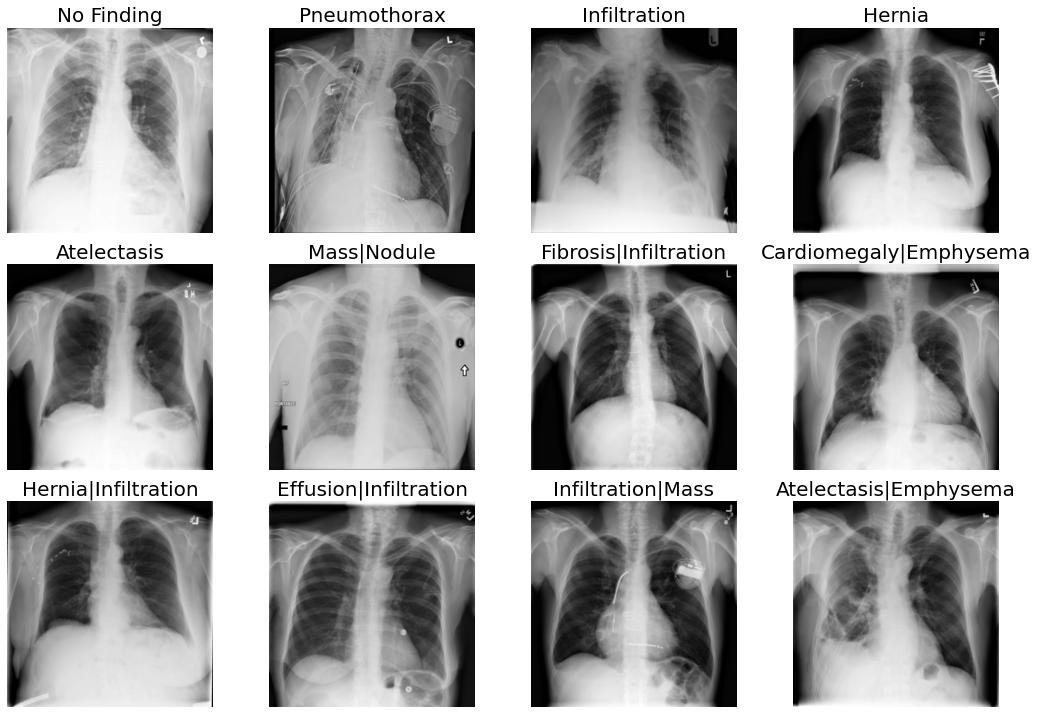

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# settings
h, w = 15, 10        # for raster image
nrows, ncols = 3, 4  # array of sub-plots
figsize = [15, 10]     # figure size, inches

# prep (x,y) for extra plotting on selected sub-plots
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

row = [3, 50,33,10,111,12, 94, 1, 7,20,60, 500 ]
count = 0
# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    img =plt.imread("../data/01_raw/images-224/" + df_labels['Image Index'][row[count]])
    axi.imshow(img, cmap='gray')
    axi.axis('off')
    # get indices of row/column
    # write row/col indices as axes' title for identification
    axi.set_title(df_labels['Finding Labels'][row[count]], size=20)
    count = count +1


plt.tight_layout(True)
plt.savefig('samples_xray')
plt.show()

# 4. Visualize Patient ID

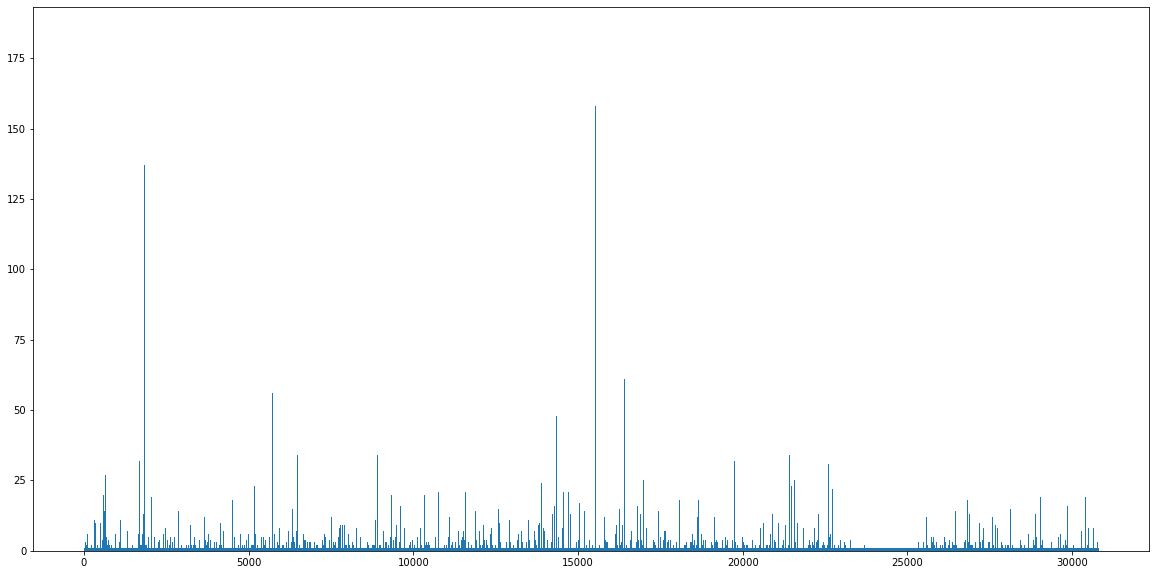

In [83]:
average = df_labels['Patient ID'].count()/len(df_labels['Patient ID'].unique())
plt.figure(figsize=(20,10))
y, x, _= plt.hist(df_labels['Patient ID'],bins =30805)
#plt.hlines(average, 100, 100)
plt.show()

In [86]:
print('In average, there are ' + str(average))
print('The max number of images per patient is ' + str(y.max()))
print('The min number of images per patient is ' + str(1))

In average, there are 3.639668884921279
The max number of images per patient is 184.0
The min number of images per patient is 1


# 5. Visualize Correlation between Diseases

In [94]:
df_disease= df_labels[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']].copy()

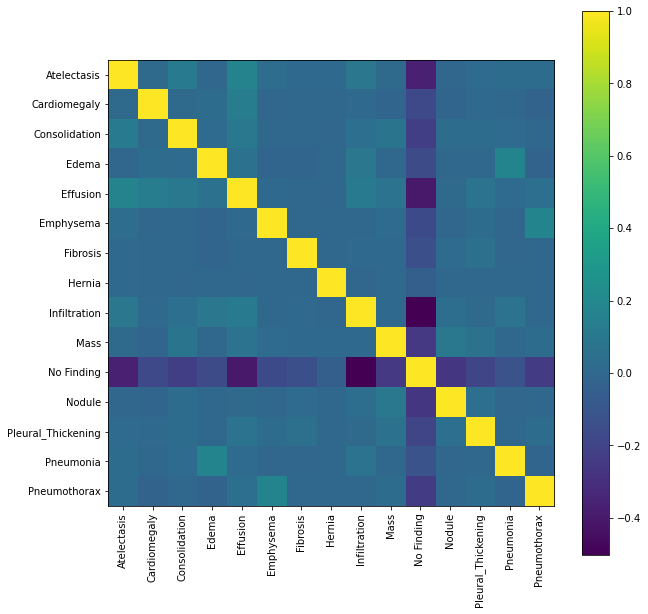

In [117]:
#reference: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
df = df_disease.corr()
plt.figure(figsize=(10,10))
plt.imshow(df, cmap ="viridis") 
  
# Displaying a color bar to understand 
# which color represents which range of data 
plt.colorbar() 
  
# Assigning labels of x-axis  
# according to dataframe 
plt.xticks(range(len(df)), df.columns, rotation='vertical') 
  
# Assigning labels of y-axis  
# according to dataframe 
plt.yticks(range(len(df)), df.index)
  
# Displaying the figure 
plt.savefig('heat_map_disease')
plt.show() 

# 6. Visualize Correlation between Diseases

[60412, 51708]


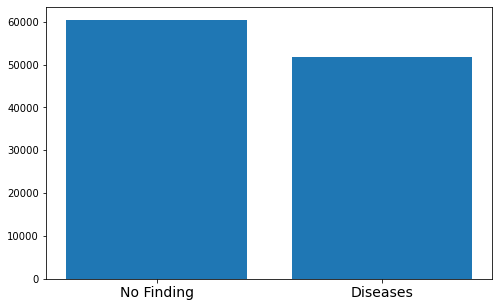

In [172]:
count_disease = []
for column in df_disease.columns:
    count_disease.append(df_disease[df_disease[column]==1][column].count())
dist = [count_disease[10],len(df_disease) - count_disease[10]]
plt.figure(figsize=(8,5))
plt.bar(range(len(dist)), dist, align='center')
plt.xticks(range(len(dist)), ['No Finding', 'Diseases'], size='small', fontsize=14)  
plt.savefig('binary distribution')
print(dist)
plt.show()

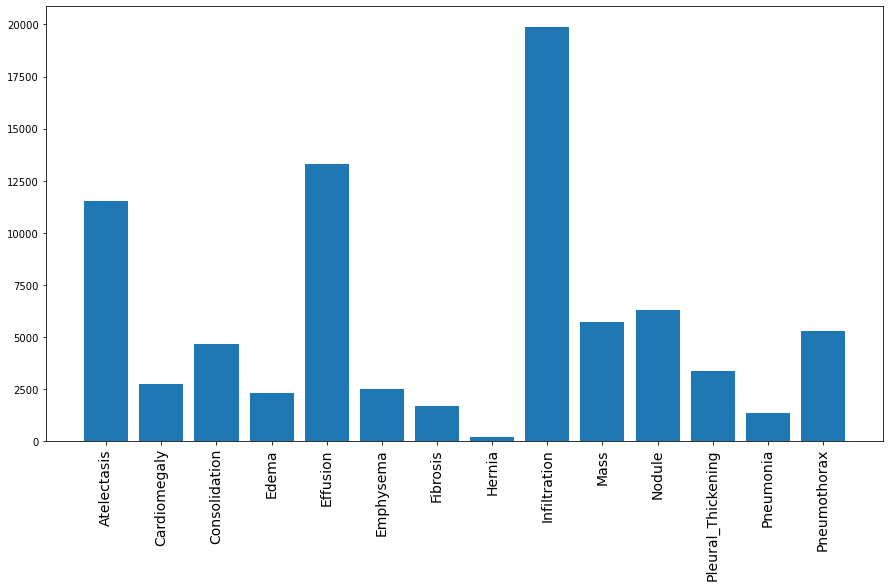

In [170]:
count_disease = []
columns = []
for column in df_disease.columns:
    if column!='No Finding':
        count_disease.append(df_disease[df_disease[column]==1][column].count())
        columns.append(column)

plt.figure(figsize=(15,8))
plt.bar(range(len(count_disease)), count_disease, align='center')
plt.xticks(range(len(columns)), columns, size='small', rotation ='vertical', fontsize=14)  
plt.savefig('hist_disease')
plt.show()